# EDA - Viz pratice

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

In [4]:
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [5]:
# check columns
# nls97.columns.tolist()

Text(1.18,220,'Outlier threshold')

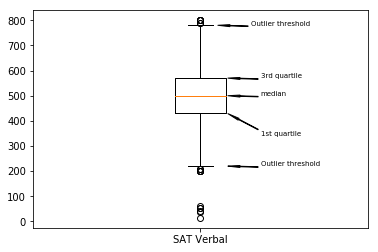

In [6]:
plt.boxplot(nls97["satverbal"].dropna(), labels=["SAT Verbal"])
plt.annotate("Outlier threshold", xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))
plt.annotate("3rd quartile", xy=(1.08,570), xytext=(1.18,570), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))
plt.annotate("median", xy=(1.08,500), xytext=(1.18,500), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))
plt.annotate("1st quartile", xy=(1.08,430), xytext=(1.18,340), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))
plt.annotate("Outlier threshold", xy=(1.08,220), xytext=(1.18,220), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))

In [7]:
nls97["satverbal"].dropna().skew()

-0.19880761602337343

In [8]:
weeksworked = nls97.loc[:, ["highestdegree", "weeksworked16", "weeksworked17"]]

Text(0.5,1,'Boxplots of Weeks Worked')

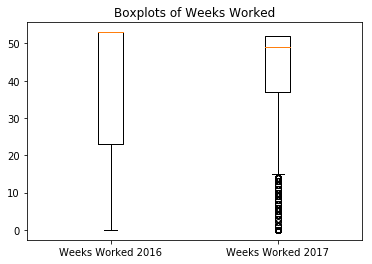

In [9]:
wk16 = weeksworked["weeksworked16"].dropna()
wk17 = weeksworked["weeksworked17"].dropna()

plt.boxplot([wk16, wk17],labels=["Weeks Worked 2016", "Weeks Worked 2017"])
plt.title("Boxplots of Weeks Worked")

In [10]:
totvars = ["total_cases", "total_deaths", "total_cases_pm", "total_deaths_pm"]
totvarslabels = ["cases", "deaths", "cases per million", "deaths per million"]
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

total_cases   total_deaths  total_cases_pm  total_deaths_pm
count  2.100000e+02     210.000000      210.000000       210.000000
mean   2.921614e+04    1770.714286     1355.357943        55.659129
std    1.363978e+05    8705.565857     2625.277497       144.785816
min    0.000000e+00       0.000000        0.000000         0.000000
25%    1.757500e+02       4.000000       92.541500         0.884750
50%    1.242500e+03      25.500000      280.928500         6.154000
75%    1.011700e+04     241.250000     1801.394750        31.777250
max    1.790191e+06  104383.000000    19771.348000      1237.551000

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb450183f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb45018ac18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb450183e10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb4501944a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4501948d0>,
 'means': []}

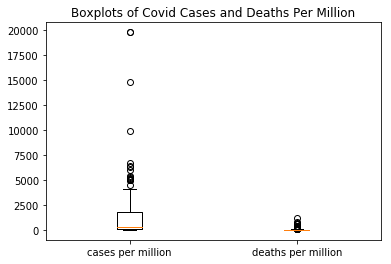

In [11]:
cases_pm = covidtotalsonly["total_cases_pm"]
deaths_pm = covidtotalsonly["total_deaths_pm"]

fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([cases_pm, deaths_pm], labels=["cases per million", "deaths per million"])

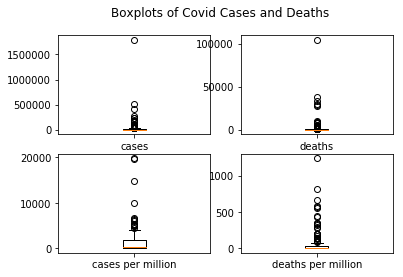

In [12]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Boxplots of Covid Cases and Deaths")
axes = axes.ravel()
for j, ax in enumerate(axes):
    ax.boxplot(covidtotalsonly.iloc[:,j], labels=[totvarslabels[j]])


## Grouped Boxplots

In [13]:
def gettots(x):
    out = {}
    out["min"] = x.min()
    out["qr1"] = x.quantile(0.25)
    out["med"] = x.median()
    out["qr3"] = x.quantile(0.75)
    out["max"] = x.max()
    out["count"] = x.count()
    return pd.Series(out)

In [14]:
nls97.groupby(["highestdegree"])["weeksworked17"].apply(gettots).unstack()

min   qr1   med   qr3   max   count
highestdegree                                       
0. None          0.0   0.0  40.0  52.0  52.0   510.0
1. GED           0.0   8.0  47.0  52.0  52.0   848.0
2. High School   0.0  31.0  49.0  52.0  52.0  2665.0
3. Associates    0.0  42.0  49.0  52.0  52.0   593.0
4. Bachelors     0.0  45.0  50.0  52.0  52.0  1342.0
5. Masters       0.0  46.0  50.0  52.0  52.0   538.0
6. PhD           0.0  46.5  50.0  52.0  52.0    51.0
7. Professional  0.0  47.0  50.0  52.0  52.0    97.0

[Text(0,0,'0. None'),
 Text(0,0,'1. GED'),
 Text(0,0,'2. High School'),
 Text(0,0,'3. Associates'),
 Text(0,0,'4. Bachelors'),
 Text(0,0,'5. Masters'),
 Text(0,0,'6. PhD'),
 Text(0,0,'7. Professional')]

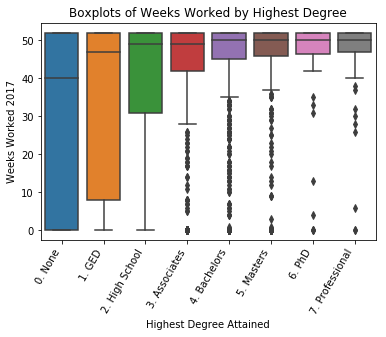

In [15]:
myplt = sns.boxplot("highestdegree","weeksworked17", data=nls97, order=sorted(nls97["highestdegree"].dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel("Highest Degree Attained")
myplt.set_ylabel("Weeks Worked 2017")
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment="right")

## Violin Plots

/Users/royceto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-0.3,500,'frequency')

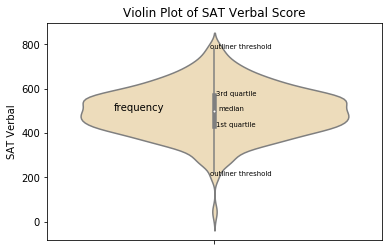

In [16]:
sns.violinplot(nls97["satverbal"], color="wheat", orient="v")
plt.title("Violin Plot of SAT Verbal Score")
plt.ylabel("SAT Verbal")
plt.text(0.08, 780, "outliner threshold", horizontalalignment="center", size="x-small")
plt.text(0.065, nls97["satverbal"].quantile(0.75), "3rd quartile", horizontalalignment="center", size="x-small")
plt.text(0.05, nls97["satverbal"].median(), "median", horizontalalignment="center", size="x-small")
plt.text(0.065, nls97["satverbal"].quantile(0.25), "1st quartile", horizontalalignment="center", size="x-small")
plt.text(0.08, 210, "outliner threshold", horizontalalignment="center", size="x-small")
plt.text(-0.3,500,"frequency")

In [17]:
nls97["satverbal"].skew()

-0.19880761602337346

In [18]:
nls97.loc[:, ["weeksworked16","weeksworked17"]].describe()

weeksworked16  weeksworked17
count    7068.000000    6670.000000
mean       39.127476      39.016642
std        21.336629      19.465974
min         0.000000       0.000000
25%        23.000000      37.000000
50%        53.000000      49.000000
75%        53.000000      52.000000
max        53.000000      52.000000

/Users/royceto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Violin Plots of Weeks Worked')

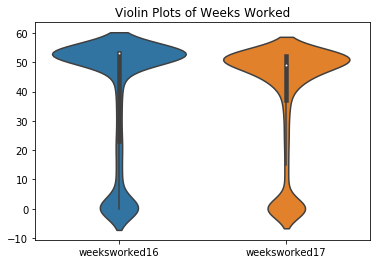

In [19]:
sns.violinplot(data=nls97.loc[:,["weeksworked16","weeksworked17"]])
plt.title("Violin Plots of Weeks Worked")

/Users/royceto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


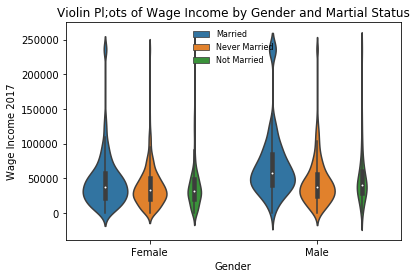

In [20]:
nls97["matrialstatuscollapsed"] = nls97["maritalstatus"].replace(["Married", "Never-married", "Divorced", "Separated", "Widowed"],["Married","Never Married","Not Married","Not Married","Not Married"])

sns.violinplot(nls97["gender"], nls97["wageincome"], hue=nls97["matrialstatuscollapsed"], scale="count")

plt.title("Violin Pl;ots of Wage Income by Gender and Martial Status")
plt.xlabel("Gender")
plt.ylabel("Wage Income 2017")
plt.legend(title="", loc="upper center", framealpha=0, fontsize=8)

## Scatter Plots

In [21]:
landtemps = pd.read_csv("data/landtemps2019avgs.csv")

Text(0.5,1,'Latitude and Average Temperature in 2019')

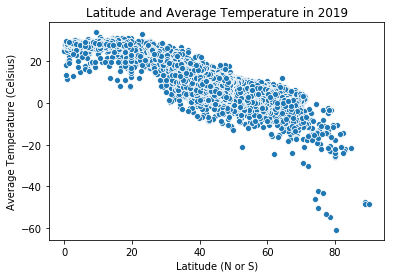

In [22]:
sns.scatterplot(x="latabs", y="avgtemp", data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")

Text(0.5,1,'Latitude and Average Temperature in 2019')

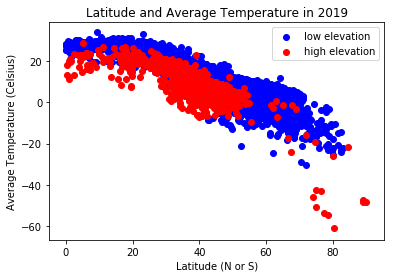

In [23]:
low = landtemps.loc[landtemps["elevation"]<=1000]
high = landtemps.loc[landtemps["elevation"]>1000]

plt.scatter(x="latabs", y="avgtemp", c="blue", data=low)
plt.scatter(x="latabs", y="avgtemp", c="red", data=high)
plt.legend(("low elevation", "high elevation"))

plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")

/Users/royceto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Latitude and Average Temperature in 2019')

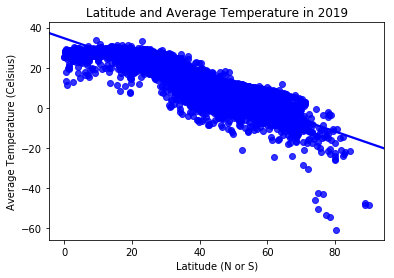

In [24]:
sns.regplot(x="latabs", y="avgtemp", data=landtemps, color="blue")

plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")

/Users/royceto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Latitude and Average Temperature in 2019')

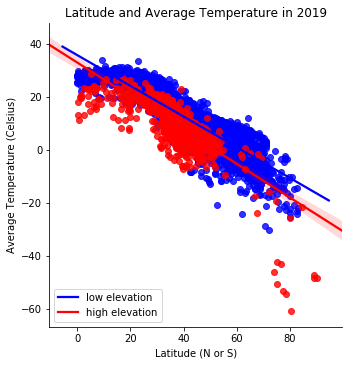

In [25]:
landtemps["elevation_group"] = np.where(landtemps["elevation"]<=1000, "low", "high")

sns.lmplot(x="latabs", y="avgtemp", hue="elevation_group", palette=dict(low="blue", high="red"), legend_out=False, data=landtemps)

plt.legend(("low elevation", "high elevation"), loc="lower left")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")

In [26]:
high.loc[(high["latabs"]>38)&(high["avgtemp"]>=18), ["station","country","latabs","elevation", "avgtemp"]]

station        country   latabs  elevation    avgtemp
3943       LAJES_AB       Portugal  38.7303     1016.2  18.041667
5805  WILD_HORSE_6N  United States  38.9031     1438.7  22.770000

## Line Plots

In [27]:
coviddaily = pd.read_csv("data/coviddaily720.csv", parse_dates=["casedate"])

In [28]:
coviddaily.head()

iso_code   casedate     location continent  new_cases  new_deaths  \
0      AFG 2019-12-31  Afghanistan      Asia        0.0         0.0   
1      AFG 2020-01-01  Afghanistan      Asia        0.0         0.0   
2      AFG 2020-01-02  Afghanistan      Asia        0.0         0.0   
3      AFG 2020-01-03  Afghanistan      Asia        0.0         0.0   
4      AFG 2020-01-04  Afghanistan      Asia        0.0         0.0   

   population  pop_density  median_age  gdp_per_capita  hosp_beds      region  
0  38928341.0       54.422        18.6        1803.987        0.5  South Asia  
1  38928341.0       54.422        18.6        1803.987        0.5  South Asia  
2  38928341.0       54.422        18.6        1803.987        0.5  South Asia  
3  38928341.0       54.422        18.6        1803.987        0.5  South Asia  
4  38928341.0       54.422        18.6        1803.987        0.5  South Asia

In [29]:
coviddailytotals = coviddaily.loc[coviddaily["casedate"].between("2020-02-01","2020-07-12")].groupby(["casedate"]).sum().reset_index()
coviddailytotals.head()

casedate  new_cases  new_deaths    population  pop_density  median_age  \
0 2020-02-01     2120.0        46.0  5.847821e+09    39219.433      2314.7   
1 2020-02-02     2608.0        46.0  5.847821e+09    39219.433      2314.7   
2 2020-02-03     2818.0        57.0  5.847821e+09    39219.433      2314.7   
3 2020-02-04     3243.0        65.0  5.847821e+09    39219.433      2314.7   
4 2020-02-05     3897.0        66.0  5.847821e+09    39219.433      2314.7   

   gdp_per_capita  hosp_beds  
0     2055140.848    238.182  
1     2055140.848    238.182  
2     2055140.848    238.182  
3     2055140.848    238.182  
4     2055140.848    238.182

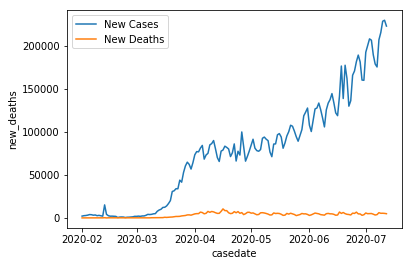

In [30]:
sns.lineplot(x="casedate", y="new_cases", data=coviddailytotals)
sns.lineplot(x="casedate", y="new_deaths", data=coviddailytotals)
plt.legend(("New Cases", "New Deaths"), loc=0)

Text(0.5,0,'New Deaths')

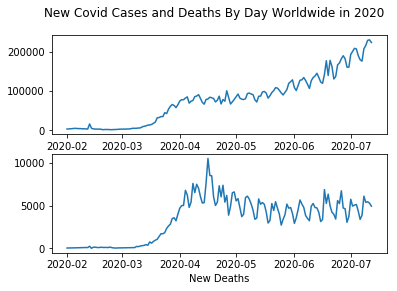

In [31]:
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")

ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals["casedate"], coviddailytotals["new_cases"])
ax1.set_xlabel("New Cases")

ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals["casedate"], coviddailytotals["new_deaths"])
ax2.set_xlabel("New Deaths")

In [32]:
display(coviddaily["casedate"].min(),coviddaily["casedate"].max())

Timestamp('2019-12-31 00:00:00')

Timestamp('2020-07-12 00:00:00')

In [33]:
regiontotals = coviddaily.loc[coviddaily["casedate"].between("2020-02-01", "2020-07-12")].groupby(["casedate","region"]).sum().reset_index()

In [34]:
# showregions = ["East Asia", "Southern Africa", "North America", "Western Europe"]

# for j in range(len(showregions)):
#     rt = regiontotals.loc[regiontotals["region"]==showregions[j], ["casedate", "new_cases"]]
#     plt.plot(rt["casedate"], rt["new_cases"], label=showregions[j])

# plt.title("New Covid Cases By Dat and Region in 2020")
# plt.ylabel("New Cases")
# plt.legend()

In [35]:
showregion = ["East Asia", "Southern Africa", "North America", "Western Europe"]

for j in range(len(showregion)):
    rt1 = regiontotals.loc[regiontotals["region"]==showregion[j],["casedate", "new_cases"]]
    plt.plot(rt1["casedate"], rt1["new_cases"], label=showregions[j])

plt.legend()

NameError: name 'showregions' is not defined

## Stack Plot -- something wrong

In [338]:
af = regiontotals.loc[regiontotals["region"]=="Southern Africa",["casedate", "new_cases"]].rename(columns={"new_cases":"afcases"})
sa = coviddaily.loc[coviddaily["location"]=="South Africa", ["casedate", "new_cases"]].rename(columns={"new_cases":"sacases"})

In [342]:
af = pd.merge(af, sa, left_on=["casedate"], right_on=["casedate"], how="left")

In [362]:
af["sacases"].fillna(0,inplace=True)
af["afcasesnosa"] = af["afcases"] - af["sacases"]
afabb = af.loc[af["casedate"].between("2020-04-01","2020-7-12")]

In [365]:
fig, ax = plt.subplots()
ax.stackplot(
    afabb["casedate"], 
    afabb["sacases"], 
    afabb["afcasesnosa"], 
    labels=["South Africa","Other Southern Africa"]
    )

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [368]:
afabb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 24 to 126
Data columns (total 4 columns):
casedate       103 non-null datetime64[ns]
afcases        103 non-null float64
sacases        103 non-null float64
afcasesnosa    103 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.0 KB


## Heatmap

In [43]:
corr = covidtotals.corr()

/Users/royceto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Scatter Plots of Age and GDP with Cases Per Million')

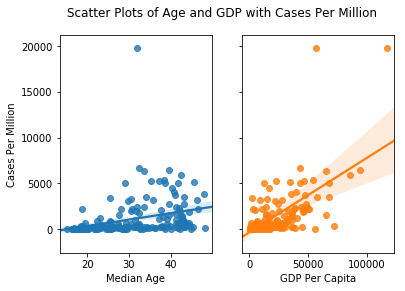

In [60]:
fig, axes = plt.subplots(1,2, sharey=True)

sns.regplot(
    covidtotals.median_age,
    covidtotals.total_cases_pm,
    ax = axes[0]
)

sns.regplot(
    covidtotals.gdp_per_capita,
    covidtotals.total_cases_pm,
    ax = axes[1]
)

axes[0].set_xlabel("Median Age")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")

plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")

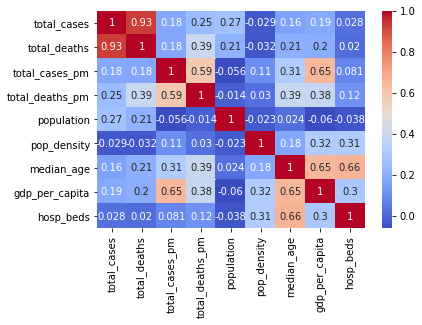

In [65]:
sns.heatmap(corr, cmap="coolwarm", annot=True)

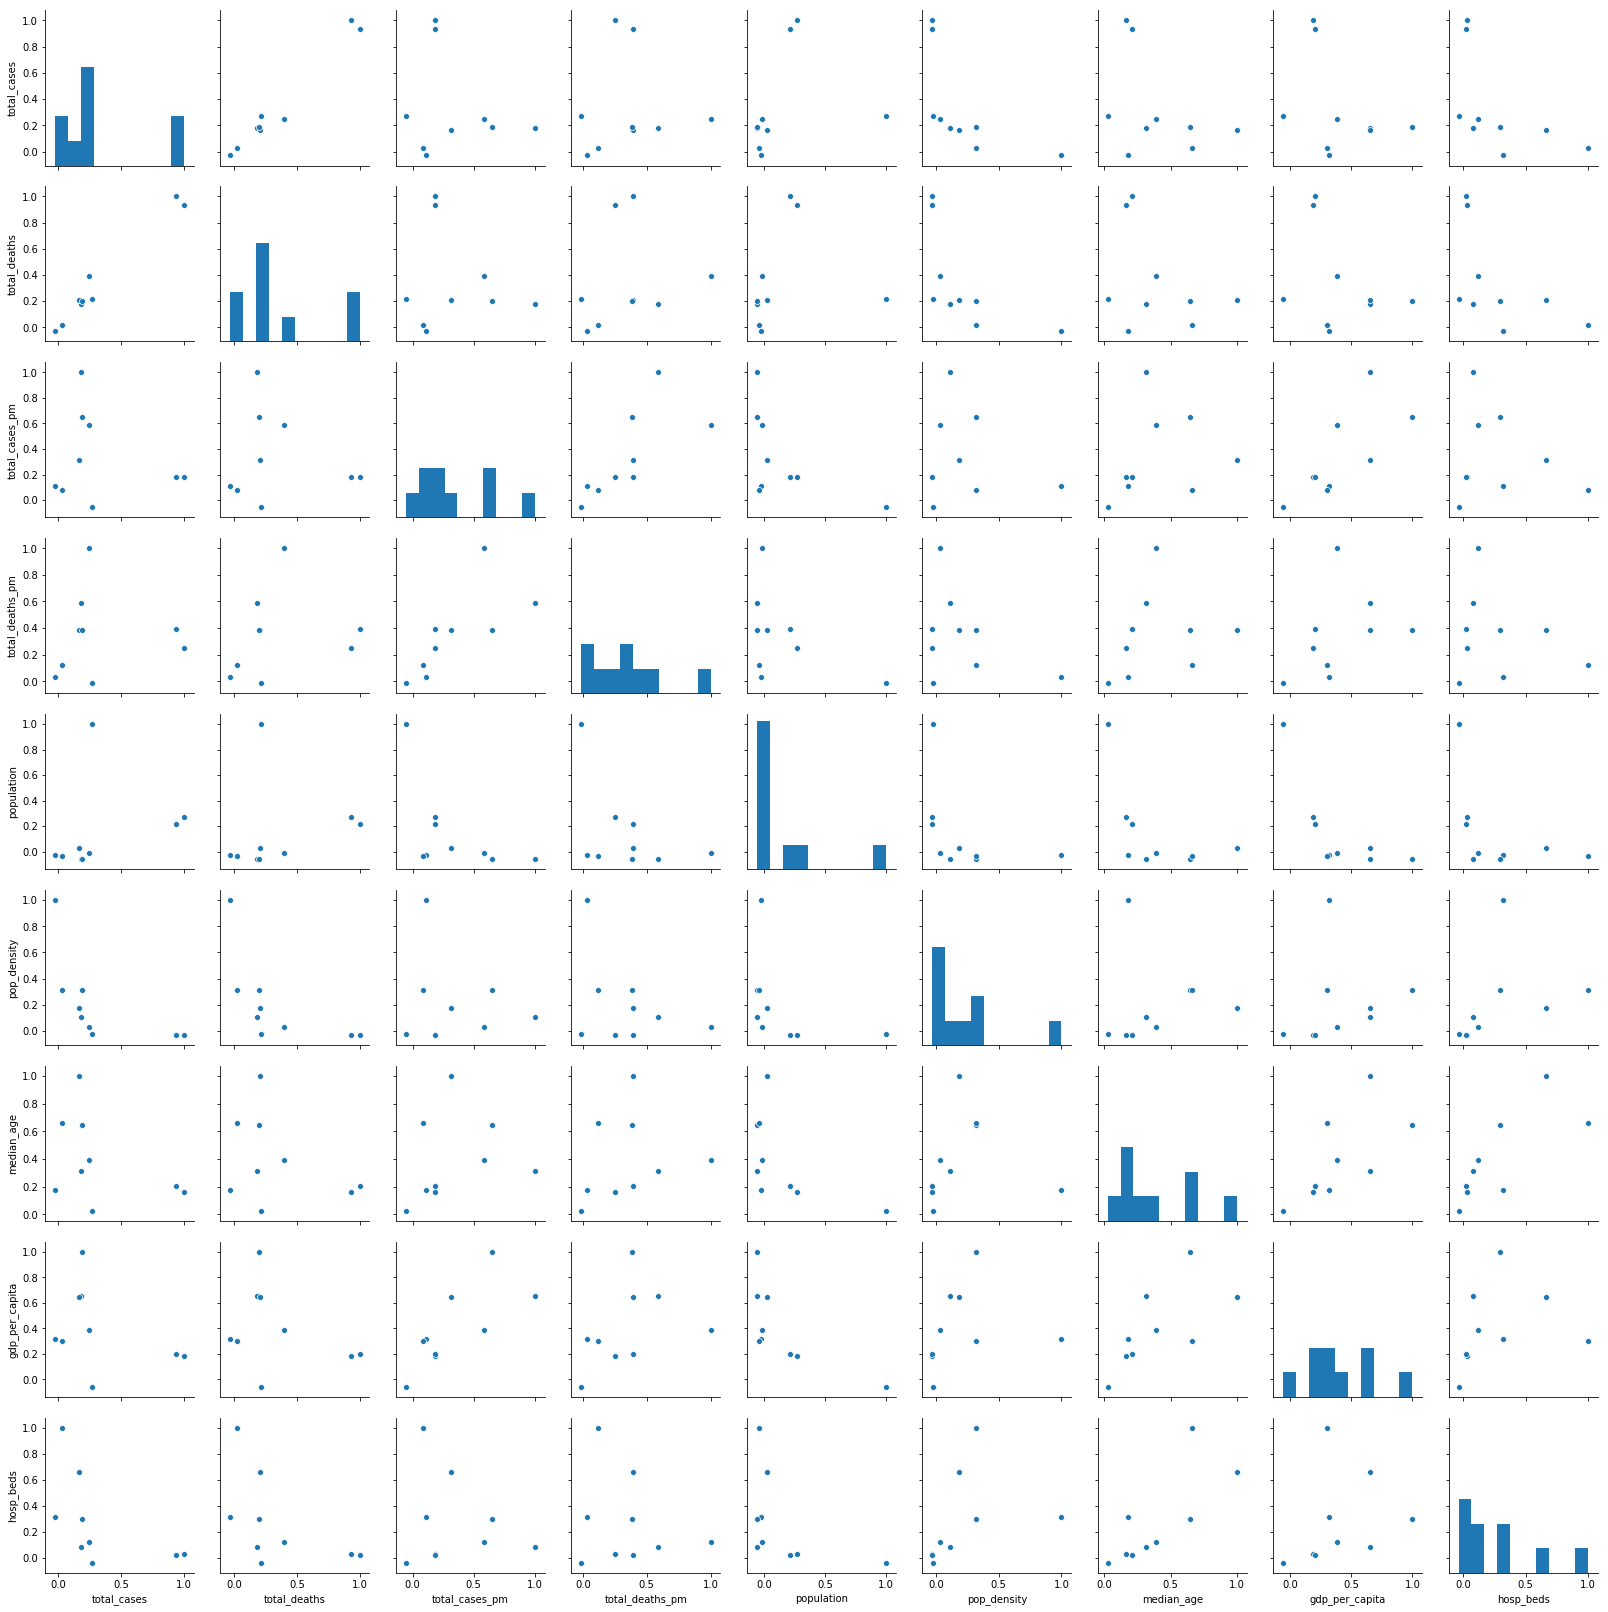

In [70]:
sns.pairplot(corr, diag_kind="hist")